In [1]:
import sys
import os
import gc
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

torch.Size([6000, 2]) torch.Size([6000]) torch.Size([900, 2]) torch.Size([900])


Data format: 
--------------------------------
type(train_datas[0].data[0]) -> <class 'torch.Tensor'>
train_datas[0].data[0].dtype -> torch.float32

type(train_datas[0].targets) -> <class 'torch.Tensor'>
train_datas[0].targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_datas[0][0] -> (torch.Size([2]), torch.Size([]))


max and min values of train_datas[0].data:
--------------------------------
	[(tensor(-5.7505), tensor(12.9405))]





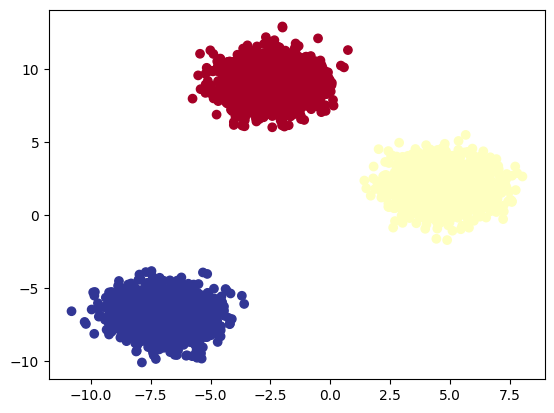

In [2]:
torch.manual_seed(42)
from SyntheticHelperFunctions.GetStandardData import class_wise_preprocessed_synthetic_data
train_datas, test_datas, test_data_for_repository = class_wise_preprocessed_synthetic_data(n_train_samples=6000,
                                                    n_test_samples=900,
                                                    n_features=2,
                                                    n_classes=3,
                                                    random_state=42)

In [3]:
torch.manual_seed(42)

repository_size = 3
NUM_DIMENSIONS = 2
NUM_EPOCHS = 100
label_for_zero = 0
BATCH_SIZE = 16
learning_rate = 0.01


n_train_zeros = 2000
n_test_zeros = 300

device="cuda" if torch.cuda.is_available() else "cpu"



In [4]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
from Networks.networks import FullyConnectedNet
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer

from torch import nn

from ZeroHelperFunctions import plots
from ZeroHelperFunctions.Curiosity import CuriosityRover

mnist_rover = CuriosityRover(device="cuda" if torch.cuda.is_available() else "cpu")


Class-0 training ...
Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
---------

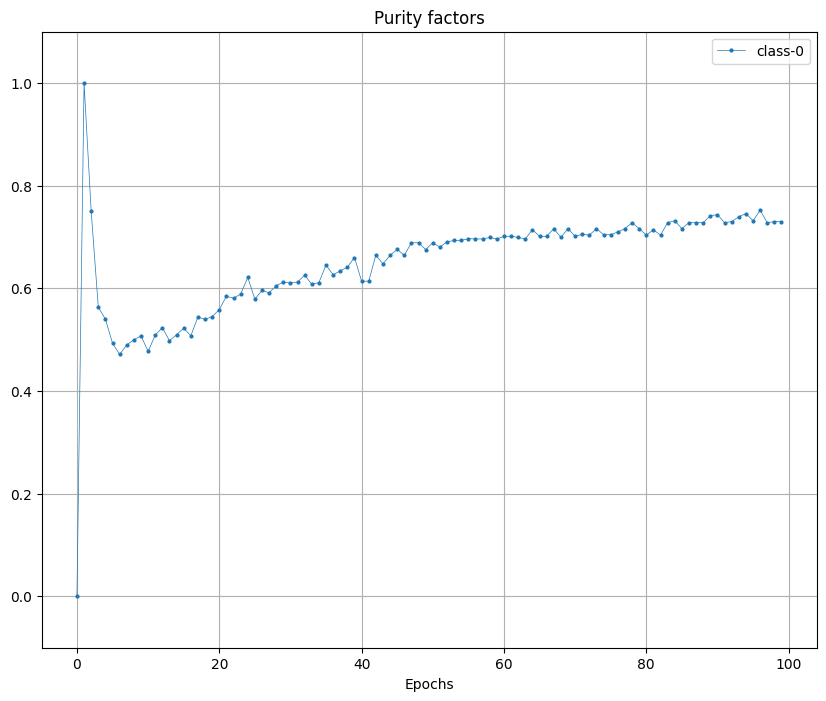

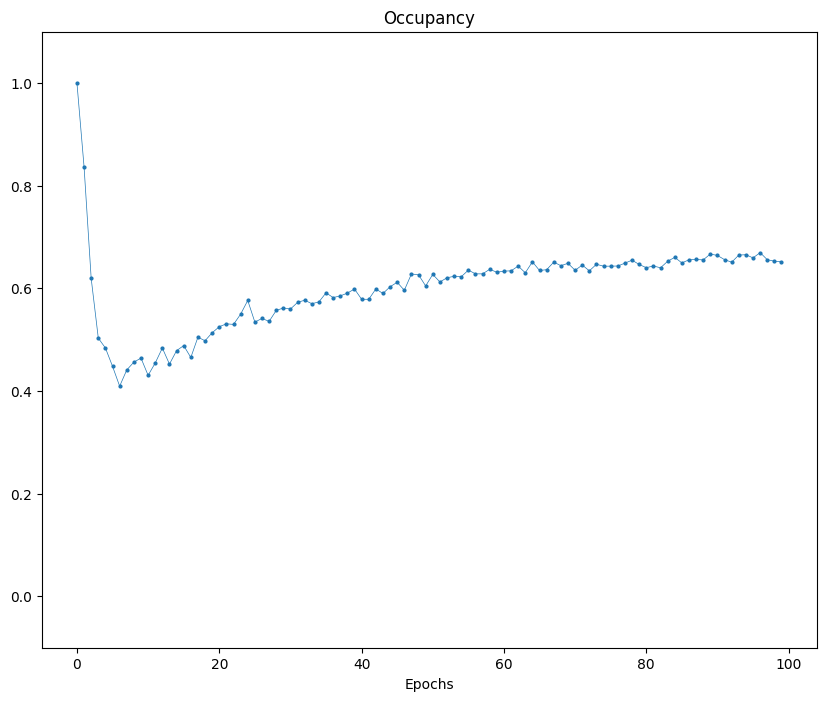

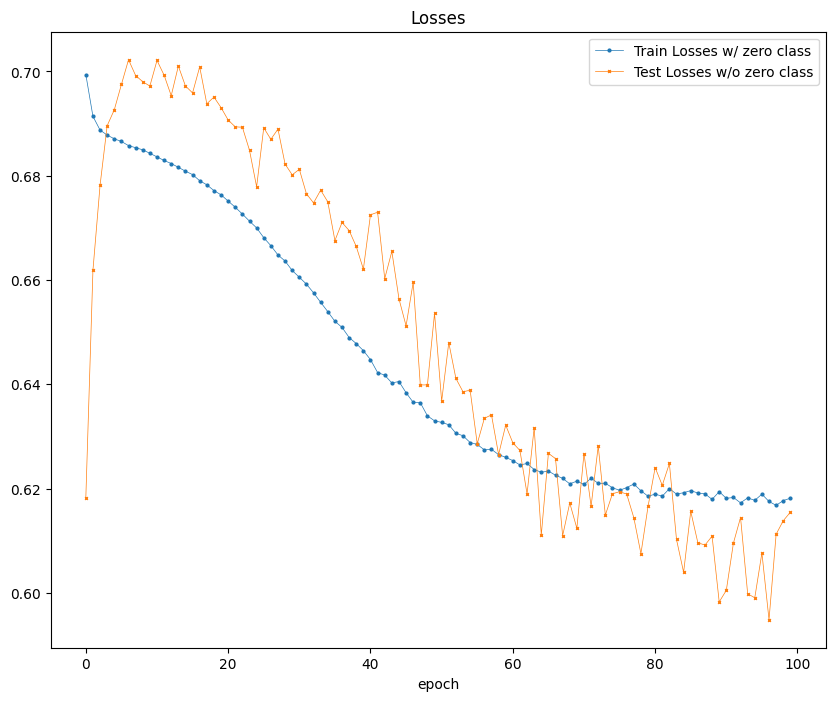

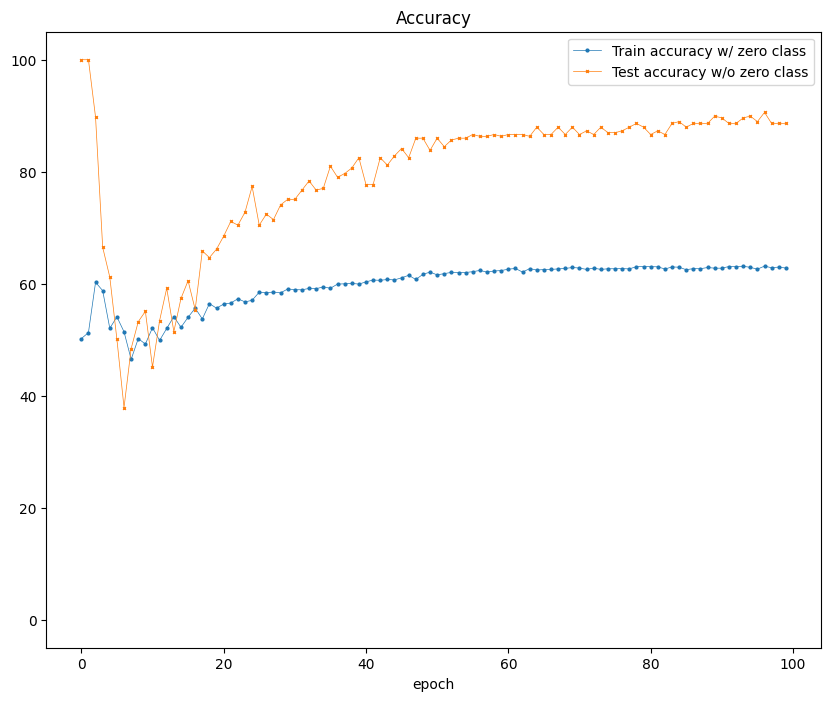

Class-1 training ...
Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
---------

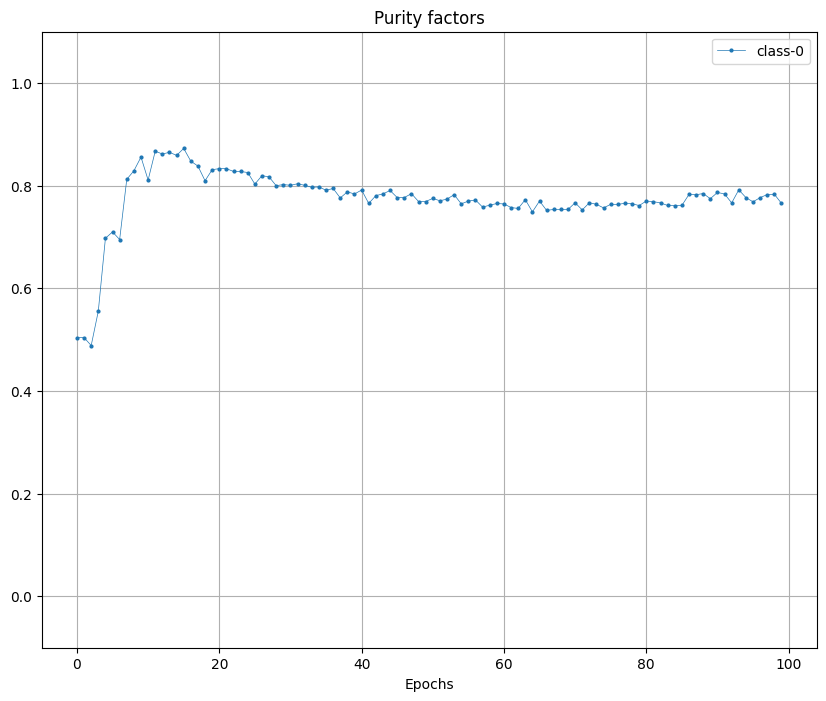

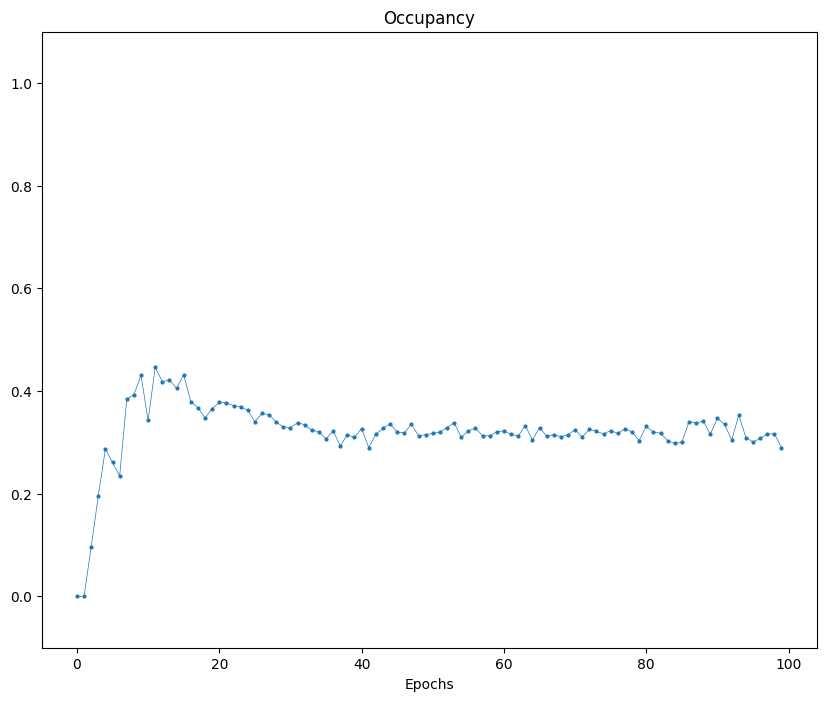

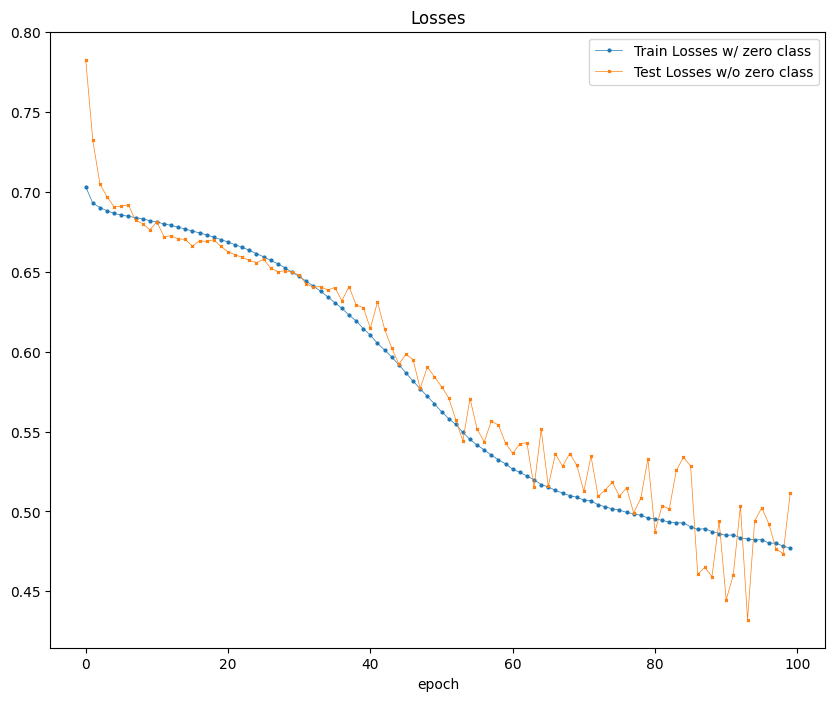

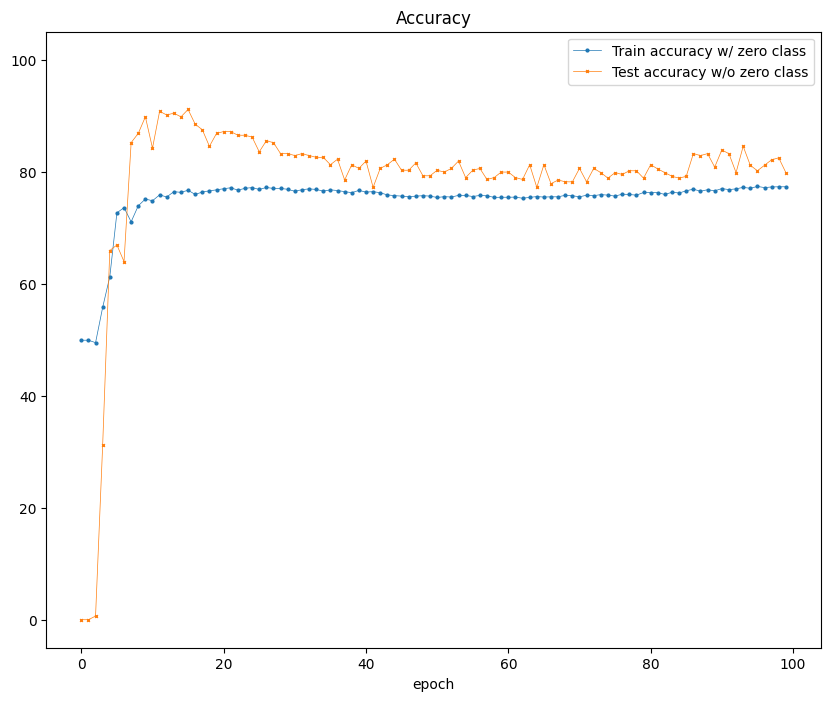

Class-2 training ...
Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
---------

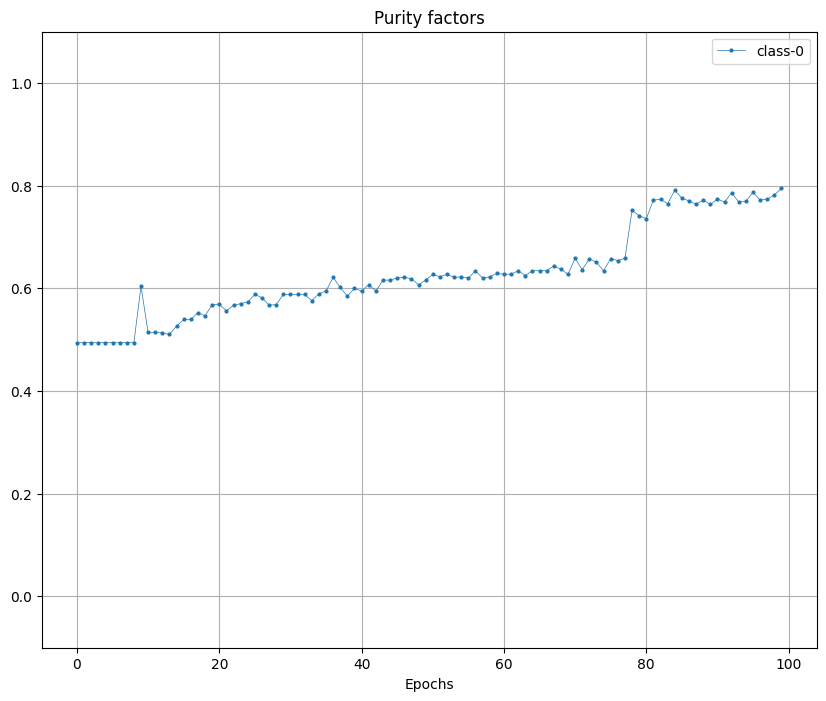

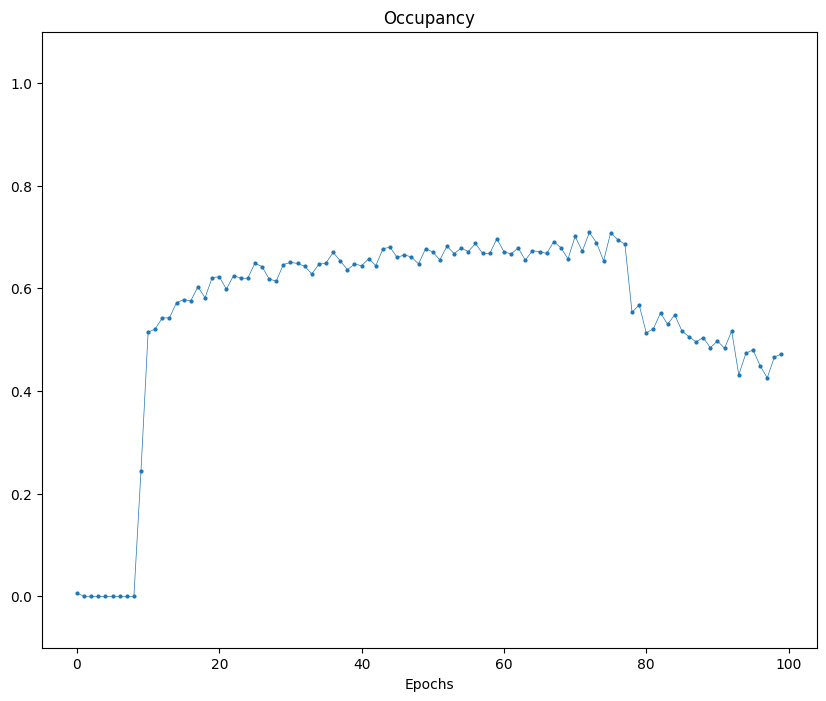

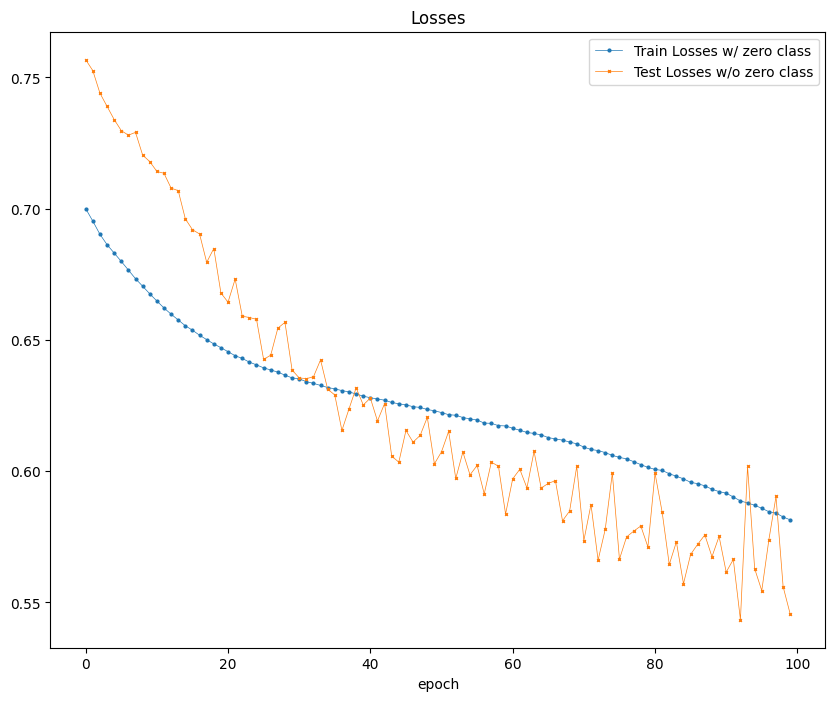

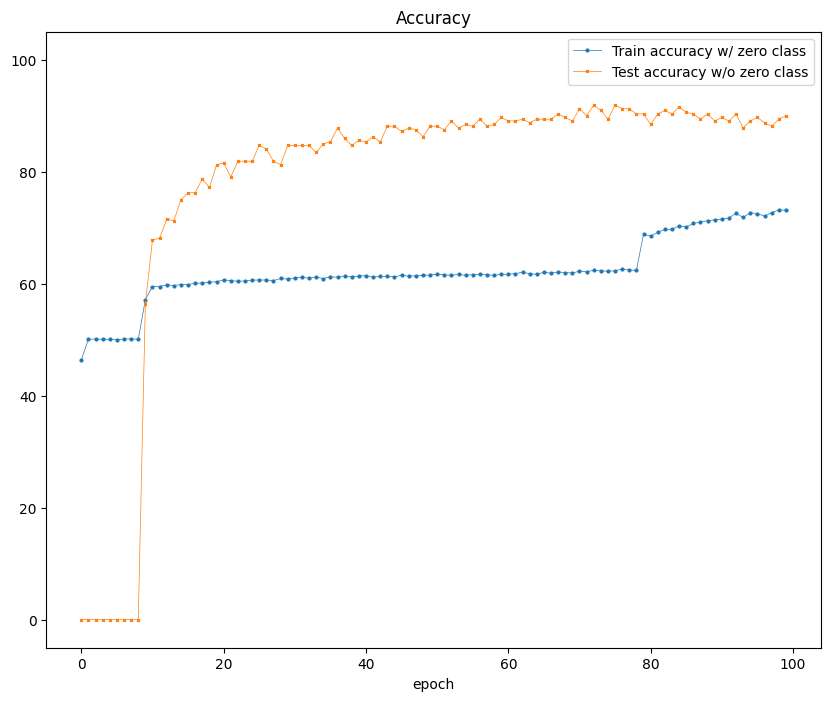

In [5]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
from Networks.networks import FullyConnectedNet
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer

from torch import nn

from ZeroHelperFunctions import plots
from ZeroHelperFunctions.Curiosity import CuriosityRover

mnist_rover = CuriosityRover(device="cuda" if torch.cuda.is_available() else "cpu")

for cl in range(repository_size):
    print(f"Class-{cl} training ...")
    dl = DataLoadersForZero(train_data=train_datas[cl],
                        test_data=test_datas[cl],
                        data_shape_of_data_point=(2))
    dl.make_dataloaders(batch_size=BATCH_SIZE,
                        n_train_zeros=n_train_zeros,
                        n_test_zeros=n_test_zeros,
                        label_for_zero=label_for_zero)
    # dl.show_border_images_of_combined_data(6000)
    dl.generate_zero_class_dataloader(10000, BATCH_SIZE, label=label_for_zero)
    # dl.check_dataloader(dl.zero_dataloader)
    # dl.check_dataloader(dl.train0_dataloader)
    # dl.check_dataloader(dl.train_dataloader)
    # dl.check_dataloader(dl.test_dataloader)
    # dl.check_dataloader(dl.test0_dataloader)
    
    # dl.check_elements_of_train_data_if_tensors()
    # dl.check_elements_of_zero_class_if_tensors()
    
    # dl.describe_train_data()
    # dl.describe_zero_class_data()
    zero_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                                layer1_dim=NUM_DIMENSIONS*2,
                                layer2_dim=NUM_DIMENSIONS*2,
                                layer3_dim=50,
                                num_classes=1)
    zero_trainer = ZeroTrainer(model=zero_model,
                            number_of_non_zero_classes=1,
                            train_dl=dl.train0_dataloader,
                            test_dl=dl.test_dataloader,
                            purity_fact_dl=dl.test0_dataloader,
                            zero_dl=dl.zero_dataloader,
                            loss_fn=nn.BCEWithLogitsLoss(),
                            optimizer=torch.optim.SGD(params=zero_model.parameters(), lr=learning_rate),
                            label_of_zero_class=label_for_zero,
                            device=device)
    zero_trainer.train(epochs=NUM_EPOCHS)
    plots.plot_pf(zero_trainer.purities)
    plots.plot_of(zero_trainer.occupancy)
    plots.plot_train_test_losses(zero_trainer.train_loss,
                                zero_trainer.test_loss)
    plots.plot_train_test_accs(zero_trainer.train_acc,
                            zero_trainer.test_acc)
    mnist_rover.add_model_for_an_anomaly(zero_model, f"MNIST - {cl}")

In [6]:
from torch.utils.data import DataLoader

test_dataloader_for_repository = DataLoader(test_data_for_repository,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

In [7]:
from ZeroHelperFunctions.Mismatches import Mismatches
mismatch = Mismatches(test_dataloader_for_repository, mnist_rover)

In [8]:
mismatch.mismatch_targets.shape, test_data_for_repository.targets.shape

(torch.Size([332]), torch.Size([900]))

In [9]:
mismatch.test_acc

63.26754385964912